### 타이타닉
1. 데이터 읽고 전체적으로 상황 확인하기

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
raw_data = pd.read_csv('../../data/titanic_train.csv', index_col='PassengerId')
raw_data.head()

### 컬럼 정보 확인하기
- PassengerId : 승객번호
- Survived : 생존여부(1:생존, 0:사망)
- Pclass : 승선권 클래스(1: 1st, 2:2nd, 3:3rd)
- Name : 승객이름
- Sex : 승객 성별
- Age : 승객 나이
- Sibsp : 동반한 형제자매, 배우자 수
- Patch : 동반한 부모, 자식 수
- Ticket : 티켓의 고유 넘버
- Fare : 티켓의 요금
- Cabin : 객실번호
- Emarked : 승선한 항구명 (C:Cherbourg, Q:Queenstown, S:Southampton)

In [ ]:
raw_data.info()
# 갯수, not null, 등 ㅏㅁㄴㄴㄴㅇ

In [ ]:
raw_data.describe(include = np.object)   
# 숫자에 대해서만 보여준기때문에 include를 이용해서 문자열도 포함시켜서 나오게 한다,

In [ ]:
len(raw_data)

In [ ]:
raw_data.dtypes
# type에 대해서만 나온다.

### 각 객실 등급별 분포 수 알아보기
데이타 프레임[컬럼명].value_counts()

In [ ]:
raw_data['Pclass'].value_counts()

### 1등칸 객실 승객의 생존자 수는?

In [ ]:
# 1등칸 객실 승객의 생존자 수
result = raw_data[(raw_data['Pclass'] == 1)&(raw_data['Survived'] == 1)]
result.head()

In [ ]:
len(result)

### 3등칸 객실 남자 숭객의 생존자 수는?

In [62]:
# 성별 컬럼 구성요소 확인하기
raw_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [63]:
result = raw_data[(raw_data['Pclass'] == 3)&(raw_data['Sex'] == 'male')&(raw_data['Survived']==1)]
result.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C
75,1,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S
82,1,3,"Sheerlinck, Mr. Jan Baptist",male,29.0,0,0,345779,9.5000,NaN,S
108,1,3,"Moss, Mr. Albert Johan",male,NaN,0,0,312991,7.7750,NaN,S


In [64]:
len(result)

47

### 전체 생존률 구하기
- (생존자수/전체승객인원)*100

In [ ]:
len(raw_data[raw_data['Survived']==1])

len(raw_data)

(len(raw_data[raw_data['Survived']==1])/len(raw_data))*100


# round(숫자, 소수점 자리수)
round((len(raw_data[raw_data['Survived']==1])/len(raw_data))*100, 3)

## 퀴즈
1. 여자생존자수? 남자 생존자수?
2. 남자와 여자의 생존률 구하기
3. 1등칸의 생존률 구하기

In [58]:
# 1. 여자생존자수? 
len(raw_data[raw_data['Sex']== 'female'])

314

In [59]:
# 1. 남자 생존자수?
len(raw_data[raw_data['Sex']== 'male'])

577

In [76]:
# 2. 여자의 생존률 구하기

print('여자 생존률 :', len(raw_data[(raw_data['Sex']== 'female')&(raw_data['Survived']==1)])/len(raw_data['Survived']==1)*100)
print('남자 생존률 :', len(raw_data[(raw_data['Sex']== 'male')&(raw_data['Survived']==1)])/len(raw_data)*100)

여자 생존률 : 26.15039281705948
남자 생존률 : 12.2334455667789


In [ ]:
# 3. 1등칸의 생존률 구하기
print('1등칸 생존률 :', round(len(raw_data[(raw_data['Pclass']== 1)&(raw_data['Survived']==1)])
      /len(raw_data['Pclass']==1)*100, 3)

### 결측값(NaN)확인하기

In [79]:
# 결측값(NaN)이면 True
raw_data['Age'].isnull().head()

PassengerId
1    False
2    False
3    False
4    False
5    False
Name: Age, dtype: bool

In [80]:
# Age 컬럼값에서 결측값(NaN) 총 갯수 확인하기
len(raw_data[raw_data['Age'].isnull()])

177

In [81]:
raw_data['Age'].isnull().sum()

177

### 'age' 컬럼의 결측값(NaN)을 평균값으로 대체하기

In [85]:
# 평균값
age_avr = round(raw_data['Age'].mean(), 2)
age_avr

29.7

In [86]:
raw_data.loc[raw_data['Age'].isnull(), 'Age']=age_avr

In [87]:
len(raw_data[raw_data['Age'].isnull()])

0

In [88]:
raw_data.sort_values(by=['Age'], ascending=True).head()
# False 로 바꾸면 내림으로 바뀜

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S


## Quiz
1) 'Cabin'결측값 NaN을 공백으로 교체하기

2 'Embarked' 컬럼에서 아래와 같이 데이터갑승 교체한다.
- C -> France
- Q -> new Zealand
- S -> England

In [89]:
len(raw_data.loc[raw_data['Cabin'].isnull()])

687

In [95]:
raw_data.loc[raw_data['Cabin'].isnull(), 'Cabin']  = ""

In [96]:
len(raw_data.loc[raw_data['Cabin'].isnull()])

0

In [97]:
raw_data.loc[raw_data['Embarked']=='C', 'Embarked']  = "France"
raw_data.loc[raw_data['Embarked']=='Q', 'Embarked']  = "New Zealand"
raw_data.loc[raw_data['Embarked']=='S', 'Embarked']  = "England"

In [98]:
raw_data[['Name', 'Embarked']].head(7)

,Name,Embarked
PassengerId,,
1,"Braund, Mr. Owen Harris",England
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",France
3,"Heikkinen, Miss. Laina",England
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",England
5,"Allen, Mr. William Henry",England
6,"Moran, Mr. James",New Zealand
7,"McCarthy, Mr. Timothy J",England


In [99]:
raw_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

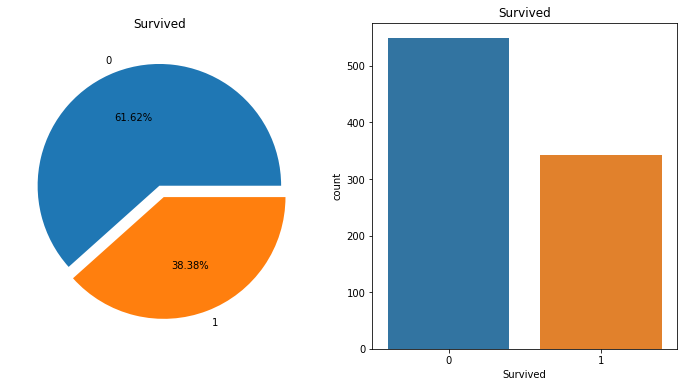

In [102]:
f, ax=plt.subplots(1,2,figsize=(12,6))

raw_data['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.2f%%', ax=ax[0])

ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('Survived', data = raw_data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

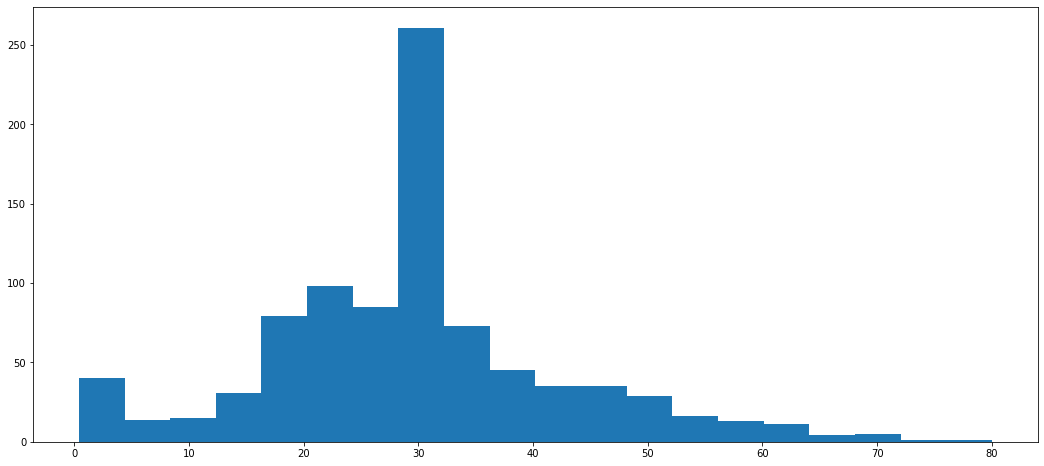

In [105]:
raw_data['Age'].hist(bins=20, figsize=(18,8), grid=False);
# bins:막대의 갯수

In [107]:
raw_data.groupby('Pclass').mean()

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.629630,37.048241,0.416667,0.356481,84.154687
2,0.472826,29.867011,0.402174,0.380435,20.662183
3,0.242363,26.403503,0.615071,0.393075,13.675550


In [108]:
raw_data.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.069811,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.331334,0.083081,0.018443,-0.549500
Age,-0.069811,-0.331334,1.000000,-0.232624,-0.179194,0.091563
SibSp,-0.035322,0.083081,-0.232624,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.179194,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.091563,0.159651,0.216225,1.000000


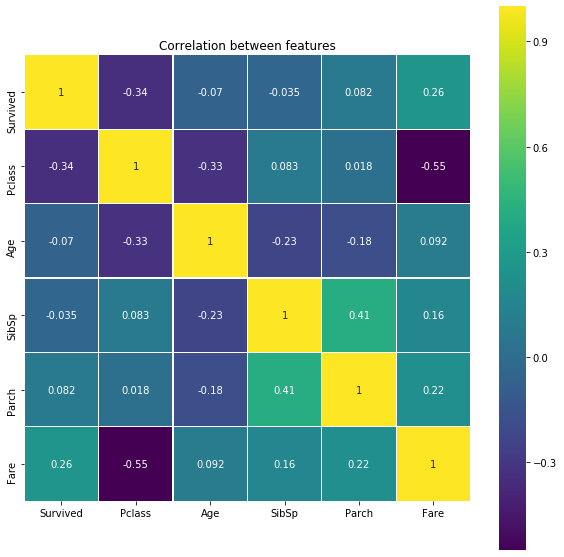

In [112]:
plt.figure(figsize=(10,10))
sns.heatmap(raw_data.corr(), linewidths=0.01, square=True, annot=True, cmap=plt.cm.viridis, linecolor="white")
plt.title('Correlation between features')
plt.show()

### 나이 구간별 및 성별 생존률 확인하기

In [113]:
raw_data['Age_cat'] =  pd.cut(raw_data['Age'], bins=[0,3,7,15,30,60,100], include_lowest=True, labels=['baby', 'children','teenage','young','adult','old'])
raw_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,,England,young
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,France,adult
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,,England,young
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,England,adult
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,,England,adult


In [114]:
raw_data.groupby('Age_cat').mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Age_cat,,,,,,
baby,0.666667,2.533333,1.672333,1.733333,1.366667,33.364307
children,0.700000,2.650000,4.950000,1.750000,1.350000,27.905830
teenage,0.454545,2.696970,11.500000,1.727273,1.121212,35.217430
young,0.335984,2.487078,25.527634,0.429423,0.234592,25.954455
adult,0.420495,1.954064,41.132509,0.363958,0.392226,42.429225
old,0.227273,1.590909,66.022727,0.136364,0.272727,41.371214


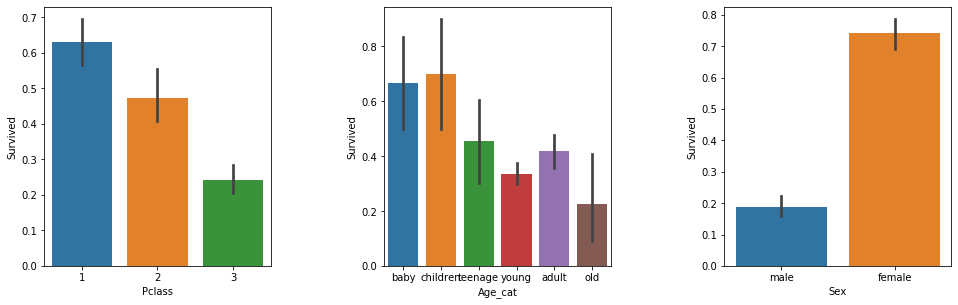

In [128]:
plt.figure(figsize=(14,4))
plt.subplot(131)
sns.barplot('Pclass', 'Survived', data=raw_data)
plt.subplot(132)
sns.barplot('Age_cat', 'Survived', data=raw_data)
plt.subplot(133)
sns.barplot('Sex', 'Survived', data=raw_data)
plt.subplots_adjust(top=1, bottom=0.1, left=0.1, right=1, hspace=0.5, wspace=0.5)
plt.show()

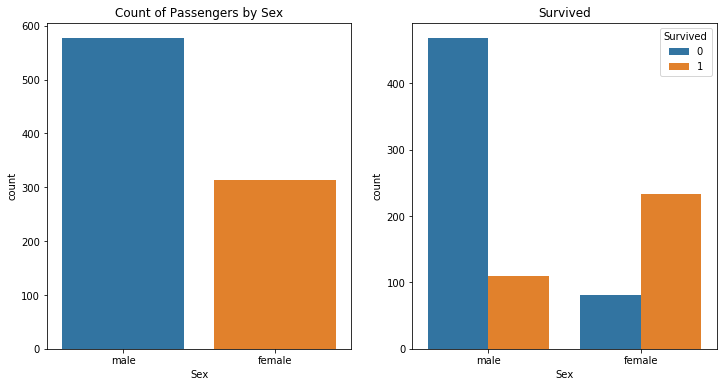

In [129]:
f, ax=plt.subplots(1,2,figsize=(12,6))
sns.countplot('Sex', data = raw_data, ax=ax[0])
ax[0].set_title('Count of Passengers by Sex')

sns.countplot('Sex', hue='Survived', data = raw_data, ax=ax[1])
# hue : 두가지씩 그래프가 그려지는 것.

ax[1].set_title('Survived')
plt.show()

### 귀족들의 생존률만 다시 조사해보기
- 이름에 호칭이 포함되어 있다.

In [132]:
raw_data.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,,England,young
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,France,adult
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,,England,young
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,England,adult
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,,England,adult
6,0,3,"Moran, Mr. James",male,29.7,0,0,330877,8.4583,,New Zealand,young
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,England,adult
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,,England,baby
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,,England,young


In [131]:
raw_data.loc[1, 'Name']

'Braund, Mr. Owen Harris'

In [133]:
raw_data.loc[1, 'Name'].split(',')[1]

' Mr. Owen Harris'

In [135]:
raw_data.loc[1, 'Name'].split(',')[1].split('.')[0]

' Mr'

In [136]:
raw_data.loc[1, 'Name'].split(',')[1].split('.')[0].strip()
# 공백이 있을수도 있으니 제거

'Mr'

In [137]:
test = lambda x: x+2
test(2)

4

In [138]:
list(map(test, range(5)))

[2, 3, 4, 5, 6]

In [139]:
conversion_rare = lambda x:x.split(',')[1].split('.')[0].strip()

raw_data['title']=raw_data['Name'].map(conversion_rare)
# title인덱스 추가해서 만들겠다.

titles = raw_data['title'].unique
titles()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [140]:
pd.crosstab(raw_data['title'], raw_data['Sex'])
# 오타가 있는것 같다.

Sex,female,male
title,,
Capt,0,1
Col,0,2
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40
Miss,182,0


In [141]:
# 오타가 있는것들은 보정을 해주자.
raw_data['title'] = raw_data['title'].replace('Mlle', 'Miss')
raw_data['title'] = raw_data['title'].replace('Ms', 'Miss')
raw_data['title'] = raw_data['title'].replace('Mme', 'Mrs')

Rare = ['Lady','the Countess','Countess','Capt', 'Master',
        'Col','Don','Dr','Major','Rev','Sir','Jonkheer', 'Dona']
# rare 배열안에 있는 것들을 한번씩 돌면서 rare로 바꿔서 표시해라.
for each in Rare:
    raw_data['title'] = raw_data['title'].replace(each, 'Rare')
    
    
raw_data['title'].unique()
# 4개의 배열이 나올것이다.

array(['Mr', 'Mrs', 'Miss', 'Rare'], dtype=object)

In [142]:
print (raw_data[['title', 'Survived']].groupby(['title'], as_index=False).mean())
# rare 생존률을 보면서 귀족생존률이 더 높다고 보기 어렵다.

  title  Survived
0  Miss  0.702703
1    Mr  0.156673
2   Mrs  0.793651
3  Rare  0.492063


In [143]:
raw_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat,title
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,,England,young,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,France,adult,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,,England,young,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,England,adult,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,,England,adult,Mr
